In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 1.72 s, sys: 255 ms, total: 1.98 s
Wall time: 2.07 s


In [2]:
def plot_total_counts(data_annot, title):
    # Calculate total counts per sample
    total_counts = data_annot.drop(['plate', 'class'], axis=1).sum(axis=1)
    plot_df = pd.DataFrame({
        'total_counts': total_counts,
        'plate': data_annot['plate'],
        'class': data_annot['class']
    })
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='plate', y='total_counts', hue='class', data=plot_df, showfliers=False)
    plt.title(title)
    plt.ylabel('Total Counts per Sample')
    plt.xlabel('Plate')
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.decomposition import PCA

#def plot_pca(data_annot, manifest, title):
def plot_pca(data_annot, title, min=0.1, max=99.9, size=10):
    # Remove annotation columns
    X = data_annot.drop(['plate', 'class'], axis=1).values
    y = data_annot['class'].values
    plates = data_annot['plate'].values
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 6))

    # ignore 0.2% of the points in the plot (there is a single very, very stray point in the combat plot)
    x_min, x_max = np.percentile(X_pca[:, 0], [min, max])
    y_min, y_max = np.percentile(X_pca[:, 1], [min, max])
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=plates, s=80, palette='Set1')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=20, palette='Set1')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette='tab20')
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette='Set3') # not bad

    # Define a custom palette with 12 colors
    #custom_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 
    #             "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442"] # Example colors

    # https://mokole.com/palette.html
    custom_colors = [
        "#2f4f4f",
        "#228b22",
        "#7f0000",
        "#00008b",
        "#ff8c00",
        "#ffff00",
        "#00ff00",
        "#00ffff",
        "#ff00ff",
        "#1e90ff",
        "#eee8aa"  #,        "#ff69b4"
    ]
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=size, palette=custom_colors)
    
    if min != 0:
        plt.xlim(xmin=x_min)
        plt.ylim(ymin=y_min)
    if max != 100:
        plt.xlim(xmax=x_max)
        plt.ylim(ymax=y_max)

    #plt.xlim(x_min, x_max)
    #plt.ylim(y_min, y_max)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [4]:
# Classify samples based on sample/subject prefix
def classify_sample(row):
    if row['sample'].startswith('CSE') or row['subject'].startswith('CSE'):
        return 'control'
    elif row['sample'].startswith('Blank') or row['subject'].startswith('Blank'):
        return 'blank'
    elif row['sample'].startswith('PLib') or row['subject'].startswith('PLib'):
        return 'phage_library'
    else:
        return 'subject'

In [5]:
# Classify samples based on sample/subject prefix
def add_lane(row):
    if row['plate'] in [1,13]:
        return "L1"
    elif row['plate'] in [2,14]:
        return "L2"
    elif row['plate'] in [3,4]:
        return "L3"
    elif row['plate'] in [5,6]:
        return "L4"
    elif row['plate'] in [15,16]:
        return "L5"
    elif row['plate'] in [17,18]:
        return "L6"
    else:
        return "L0"

In [6]:
#manifest = pd.read_csv('Counts.normalized.subtracted.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
# .iloc[:, 2:] drops the id and species columns
# .T.drop(columns=[2]) drops the bam path row/column
manifest = pd.read_csv('Counts.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
manifest.columns = ['sample','subject','type','study','group','age','sex','plate']
manifest['plate'] = manifest['plate'].astype(int)
manifest['study'] = manifest['study'].str.replace(r'^Unname.*$', '', regex=True)
manifest['group'] = manifest['group'].str.replace(r'^Unname.*$', '', regex=True)
manifest['age'] = manifest['age'].str.replace(r'^Unname.*$', '', regex=True)
manifest['sex'] = manifest['sex'].str.replace(r'^Unname.*$', '', regex=True)
manifest = manifest.sort_values(by='plate')
manifest

,sample,subject,type,study,group,age,sex,plate
2,14078-01,14078-01,glioma serum,IPS,case,60,M,1
3,14078-01dup,14078-01,glioma serum,IPS,case,60,M,1
4,14118-01,14118-01,glioma serum,IPS,case,61,M,1
5,14118-01dup,14118-01,glioma serum,IPS,case,61,M,1
6,14127-01,14127-01,glioma serum,IPS,case,63,M,1
...,...,...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,PLCO,control,67,F,18
1147,E129145,E129145,glioma serum,PLCO,control,70,M,18
1148,E129145dup,E129145,glioma serum,PLCO,control,70,M,18
1149,PLib18,PLib18,Phage Library,,,,,18


In [7]:
#check cleanup
manifest[manifest['subject'].str.contains(r'_1$|_2$', regex=True)]

,sample,subject,type,study,group,age,sex,plate


In [8]:
#check cleanup
manifest['subject'] = manifest['subject'].str.replace(r'_1$|_2$', '', regex=True)

In [9]:
#check cleanup
manifest[manifest['subject'].str.contains(r'PLib', regex=True)].head()

,sample,subject,type,study,group,age,sex,plate
95,PLib01_1,PLib01,Phage Library,,,,,1
96,PLib01_2,PLib01,Phage Library,,,,,1
191,PLib02_1,PLib02,Phage Library,,,,,2
192,PLib02_2,PLib02,Phage Library,,,,,2
287,PLib03,PLib03,Phage Library,,,,,3


In [10]:
# Use only relevant columns from manifest
manifest = manifest[['sample', 'subject', 'type', 'plate']]

manifest['class'] = manifest.apply(classify_sample, axis=1)
manifest

/var/folders/cz/x4nfh_790yn58j4sc5qp7wkc0000gn/T/ipykernel_46726/2669338044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['class'] = manifest.apply(classify_sample, axis=1)


,sample,subject,type,plate,class
2,14078-01,14078-01,glioma serum,1,subject
3,14078-01dup,14078-01,glioma serum,1,subject
4,14118-01,14118-01,glioma serum,1,subject
5,14118-01dup,14118-01,glioma serum,1,subject
6,14127-01,14127-01,glioma serum,1,subject
...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject
1147,E129145,E129145,glioma serum,18,subject
1148,E129145dup,E129145,glioma serum,18,subject
1149,PLib18,PLib18,Phage Library,18,phage_library


In [11]:
manifest['lane'] = manifest.apply(add_lane, axis=1)
manifest

/var/folders/cz/x4nfh_790yn58j4sc5qp7wkc0000gn/T/ipykernel_46726/2174302303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['lane'] = manifest.apply(add_lane, axis=1)


,sample,subject,type,plate,class,lane
2,14078-01,14078-01,glioma serum,1,subject,L1
3,14078-01dup,14078-01,glioma serum,1,subject,L1
4,14118-01,14118-01,glioma serum,1,subject,L1
5,14118-01dup,14118-01,glioma serum,1,subject,L1
6,14127-01,14127-01,glioma serum,1,subject,L1
...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject,L6
1147,E129145,E129145,glioma serum,18,subject,L6
1148,E129145dup,E129145,glioma serum,18,subject,L6
1149,PLib18,PLib18,Phage Library,18,phage_library,L6


In [12]:
%%time

data = pd.read_csv(
    'Counts.csv', header=0, skiprows=range(1, 9), index_col=0).drop(columns=['species']).T.reset_index()
# nrows=10,

data = data.rename(columns={'index':'sample'})

#data = data[~data['sample'].isin(['D082062xxx','D082062dupxxx','E045528xxx','E045528dupxxx'])]
data = data.set_index('sample')
data = data.fillna(0)

data

CPU times: user 8.2 s, sys: 2.81 s, total: 11 s
Wall time: 11 s


id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,10
14078-01dup,0,16,0,0,0,0,0,0,0,0,...,36,0,0,4,26,2,0,0,0,1
14118-01,0,0,0,0,0,0,33,0,0,0,...,25,0,0,9,0,0,0,0,0,0
14118-01dup,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,4,0
14127-01,0,78,0,0,0,0,0,0,0,0,...,38,0,0,0,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0,10,0,0,9,0,5,0,0,1,...,1,0,0,1,7,2,0,0,0,1
E129145,0,1,0,0,4,0,6,1,0,1,...,1,0,0,3,1,0,0,0,0,1
E129145dup,0,1,0,0,6,0,8,2,0,0,...,0,0,0,5,5,0,5,0,1,5


In [13]:
#data_annot = data.copy()

manifest_index = manifest.set_index('sample')
# This is slow. Why not just join on sample and then drop the unneeded columns?
#data_annot['plate'] = data_annot.index.map(manifest.set_index('sample')['plate'])
##data_annot['type'] = data_annot.index.map(manifest.set_index('sample')['type'])
#data_annot['class'] = data_annot.index.map(manifest.set_index('sample')['class'])

#data_annot = pd.merge(manifest_index, data, how='inner')
data_annot = manifest_index.join(data, how='left')
data_annot = data_annot.reset_index().set_index(['sample','subject','type','lane']) #,'plate','class'])
data_annot

,,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,L1,1,subject,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,10
14078-01dup,14078-01,glioma serum,L1,1,subject,0,16,0,0,0,0,0,0,...,36,0,0,4,26,2,0,0,0,1
14118-01,14118-01,glioma serum,L1,1,subject,0,0,0,0,0,0,33,0,...,25,0,0,9,0,0,0,0,0,0
14118-01dup,14118-01,glioma serum,L1,1,subject,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,4,0
14127-01,14127-01,glioma serum,L1,1,subject,0,78,0,0,0,0,0,0,...,38,0,0,0,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,L6,18,subject,0,10,0,0,9,0,5,0,...,1,0,0,1,7,2,0,0,0,1
E129145,E129145,glioma serum,L6,18,subject,0,1,0,0,4,0,6,1,...,1,0,0,3,1,0,0,0,0,1
E129145dup,E129145,glioma serum,L6,18,subject,0,1,0,0,6,0,8,2,...,0,0,0,5,5,0,5,0,1,5


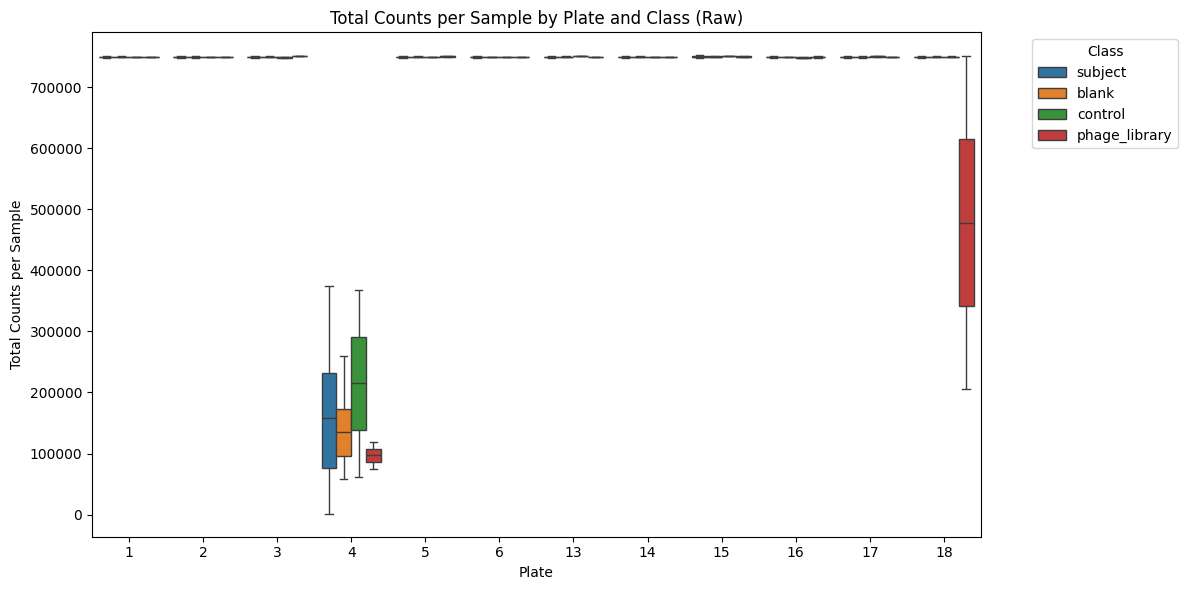

In [14]:
plot_total_counts(data_annot, "Total Counts per Sample by Plate and Class (Raw)")

Drop
```
These duplicates subject from plate 15 and 16
D082062xxx,D082062,glioma serum,PLCO,case,73,M,15
D082062dupxxx,D082062,glioma serum,PLCO,case,73,M,15
E045528xxx,E045528,glioma serum,PLCO,case,63,M,16
E045528dupxxx,E045528,glioma serum,PLCO,case,63,M,16

tail -q -n +2 /francislab/data1/working/{20241204-Illumina-PhIP/20250410-bowtie2,20241224-Illumina-PhIP/20250410-bowtie2,20250128-Illumina-PhIP/20250410-bowtie2,20250409-Illumina-PhIP/20250410-bowtie2,20250822-Illumina-PhIP/20250822b-bowtie2,20250925-Illumina-PhIP/20250925b-bowtie2}/report.t.csv | awk -F, '( $9 != "4" ){print $19,$3,$9}' | sort -k1nr,1 | tail -20
1013597 20046dup 1
1008648 PLib16dup 16
918911 14627-01dup 1
900122 14142-01dup 1
888376 PLib06dup 6
873602 C161983 18
859973 C103395dup 16
852840 Blank64dup 16
825763 D124834 16
789694 A049686dup 18
683903 1310dup 13
656100 Blank61dup 16
616581 B002699 18
543435 PLib18dup 18
76235 23565 18
2710 C661MAA 13
1411 961440dup 18
441 23339 18
414 Blank24dup 6
148 D069698dup 18


Drop D069698dup - is that in the low count list. Check..
Blank50_1
Blank03_2
Blank24dup
```


In [15]:
manifest

,sample,subject,type,plate,class,lane
2,14078-01,14078-01,glioma serum,1,subject,L1
3,14078-01dup,14078-01,glioma serum,1,subject,L1
4,14118-01,14118-01,glioma serum,1,subject,L1
5,14118-01dup,14118-01,glioma serum,1,subject,L1
6,14127-01,14127-01,glioma serum,1,subject,L1
...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject,L6
1147,E129145,E129145,glioma serum,18,subject,L6
1148,E129145dup,E129145,glioma serum,18,subject,L6
1149,PLib18,PLib18,Phage Library,18,phage_library,L6


In [16]:
manifest = manifest[manifest['plate'] != 4]
print(manifest.shape)
manifest

(1053, 6)


,sample,subject,type,plate,class,lane
2,14078-01,14078-01,glioma serum,1,subject,L1
3,14078-01dup,14078-01,glioma serum,1,subject,L1
4,14118-01,14118-01,glioma serum,1,subject,L1
5,14118-01dup,14118-01,glioma serum,1,subject,L1
6,14127-01,14127-01,glioma serum,1,subject,L1
...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject,L6
1147,E129145,E129145,glioma serum,18,subject,L6
1148,E129145dup,E129145,glioma serum,18,subject,L6
1149,PLib18,PLib18,Phage Library,18,phage_library,L6


In [17]:
manifest = manifest[manifest['plate'] != 4]
manifest.shape

(1053, 6)

In [18]:
manifest = manifest[~manifest['sample'].isin(
['1310dup','Blank61dup','002699','PLib18dup','23565','C661MAA','961440dup','23339','Blank24dup','D069698dup'])]    

manifest.shape

(1045, 6)

In [19]:
#These duplicates subject from plate 15 and 16
#D082062,D082062,glioma serum,PLCO,case,73,M,15
#D082062dup,D082062,glioma serum,PLCO,case,73,M,15
#E045528,E045528,glioma serum,PLCO,case,63,M,16
#E045528dup,E045528,glioma serum,PLCO,case,63,M,16

manifest = manifest[~((manifest['subject'].isin(['D082062','E045528'])) & (manifest['plate'].isin([15,16])))]
manifest.shape

(1041, 6)

In [20]:
# These may have already been removed during processing
manifest = manifest[~manifest['sample'].isin(['D069698dup','Blank50_1','Blank03_2','Blank24dup'])]    

manifest.shape

(1041, 6)

In [21]:
manifest['plate'].unique()

array([ 1,  2,  3,  5,  6, 13, 14, 15, 16, 17, 18])

In [22]:
manifest_index = manifest.set_index('sample')
data_annot = manifest_index.join(data, how='left')
data_annot = data_annot.reset_index().set_index(['sample','subject','type','lane']) #,'plate','class'])
data_annot

,,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,L1,1,subject,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,10
14078-01dup,14078-01,glioma serum,L1,1,subject,0,16,0,0,0,0,0,0,...,36,0,0,4,26,2,0,0,0,1
14118-01,14118-01,glioma serum,L1,1,subject,0,0,0,0,0,0,33,0,...,25,0,0,9,0,0,0,0,0,0
14118-01dup,14118-01,glioma serum,L1,1,subject,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,4,0
14127-01,14127-01,glioma serum,L1,1,subject,0,78,0,0,0,0,0,0,...,38,0,0,0,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,E097416,glioma serum,L6,18,subject,0,2,0,0,4,0,5,2,...,0,0,4,2,3,0,2,0,0,1
E097416dup,E097416,glioma serum,L6,18,subject,0,10,0,0,9,0,5,0,...,1,0,0,1,7,2,0,0,0,1
E129145,E129145,glioma serum,L6,18,subject,0,1,0,0,4,0,6,1,...,1,0,0,3,1,0,0,0,0,1


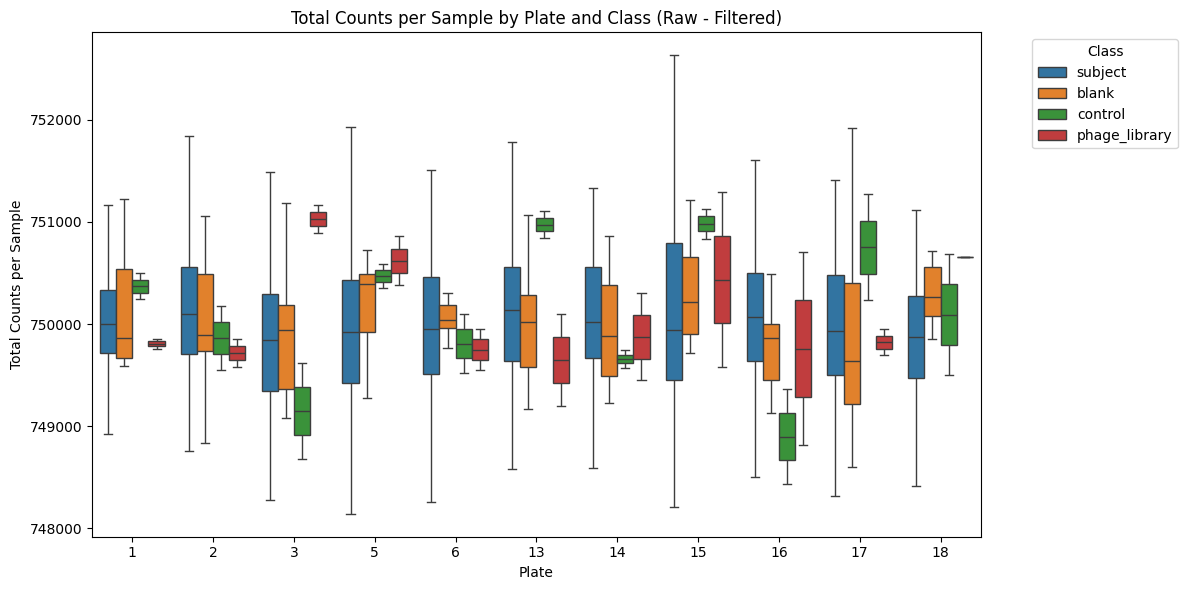

In [23]:
plot_total_counts(data_annot, "Total Counts per Sample by Plate and Class (Raw - Filtered)")

In [24]:
data = data_annot.reset_index().drop(['subject','type','lane','plate','class'],axis='columns').set_index('sample')
data

,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,10
14078-01dup,0,16,0,0,0,0,0,0,0,0,...,36,0,0,4,26,2,0,0,0,1
14118-01,0,0,0,0,0,0,33,0,0,0,...,25,0,0,9,0,0,0,0,0,0
14118-01dup,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,4,0
14127-01,0,78,0,0,0,0,0,0,0,0,...,38,0,0,0,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,0,2,0,0,4,0,5,2,0,0,...,0,0,4,2,3,0,2,0,0,1
E097416dup,0,10,0,0,9,0,5,0,0,1,...,1,0,0,1,7,2,0,0,0,1
E129145,0,1,0,0,4,0,6,1,0,1,...,1,0,0,3,1,0,0,0,0,1


In [25]:
sums=data.sum(axis='columns')
sums

sample
14078-01       750376
14078-01dup    749724
14118-01       749006
14118-01dup    750277
14127-01       750198
                ...  
E097416        749751
E097416dup     750061
E129145        750257
E129145dup     749756
PLib18         750652
Length: 1041, dtype: int64

In [26]:
n=data.div(sums,axis='index')*1000000
n

,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.665330,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.326652
14078-01dup,0.0,21.341187,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,48.017671,0.0,0.000000,5.335297,34.679429,2.667648,0.000000,0.000000,0.000000,1.333824
14118-01,0.0,0.000000,0.0,0.000000,0.000000,0.0,44.058392,0.000000,0.0,0.000000,...,33.377570,0.0,0.000000,12.015925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,0.0,0.000000,0.0,0.000000,1.332841,0.0,1.332841,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.332841,0.000000,5.331364,0.000000
14127-01,0.0,103.972551,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,50.653294,0.0,0.000000,0.000000,25.326647,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,0.0,2.667552,0.0,0.000000,5.335105,0.0,6.668881,2.667552,0.0,0.000000,...,0.000000,0.0,5.335105,2.667552,4.001328,0.000000,2.667552,0.000000,0.000000,1.333776
E097416dup,0.0,13.332249,0.0,0.000000,11.999024,0.0,6.666124,0.000000,0.0,1.333225,...,1.333225,0.0,0.000000,1.333225,9.332574,2.666450,0.000000,0.000000,0.000000,1.333225
E129145,0.0,1.332877,0.0,0.000000,5.331506,0.0,7.997260,1.332877,0.0,1.332877,...,1.332877,0.0,0.000000,3.998630,1.332877,0.000000,0.000000,0.000000,0.000000,1.332877


In [27]:
n = manifest_index.join(n, how='left')
n = n.reset_index().set_index(['sample','subject','type','lane']) #,'plate','class'])
n

,,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,L1,1,subject,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.665330,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.326652
14078-01dup,14078-01,glioma serum,L1,1,subject,0.0,21.341187,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,48.017671,0.0,0.000000,5.335297,34.679429,2.667648,0.000000,0.000000,0.000000,1.333824
14118-01,14118-01,glioma serum,L1,1,subject,0.0,0.000000,0.0,0.000000,0.000000,0.0,44.058392,0.000000,...,33.377570,0.0,0.000000,12.015925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,L1,1,subject,0.0,0.000000,0.0,0.000000,1.332841,0.0,1.332841,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.332841,0.000000,5.331364,0.000000
14127-01,14127-01,glioma serum,L1,1,subject,0.0,103.972551,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,50.653294,0.0,0.000000,0.000000,25.326647,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,E097416,glioma serum,L6,18,subject,0.0,2.667552,0.0,0.000000,5.335105,0.0,6.668881,2.667552,...,0.000000,0.0,5.335105,2.667552,4.001328,0.000000,2.667552,0.000000,0.000000,1.333776
E097416dup,E097416,glioma serum,L6,18,subject,0.0,13.332249,0.0,0.000000,11.999024,0.0,6.666124,0.000000,...,1.333225,0.0,0.000000,1.333225,9.332574,2.666450,0.000000,0.000000,0.000000,1.333225
E129145,E129145,glioma serum,L6,18,subject,0.0,1.332877,0.0,0.000000,5.331506,0.0,7.997260,1.332877,...,1.332877,0.0,0.000000,3.998630,1.332877,0.000000,0.000000,0.000000,0.000000,1.332877


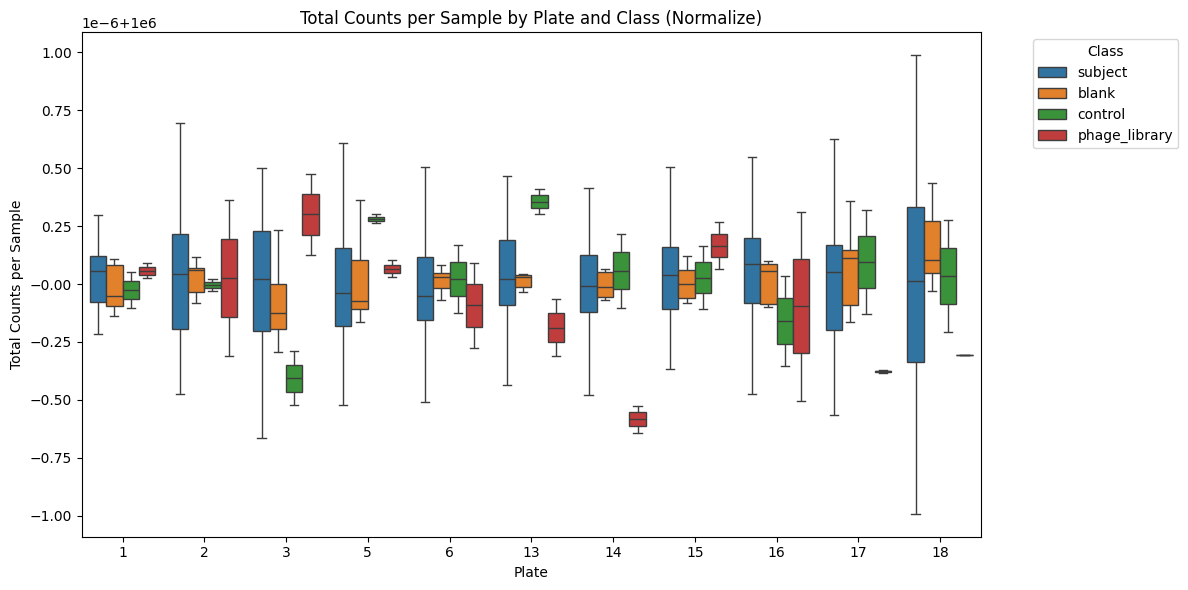

In [28]:
plot_total_counts(n, "Total Counts per Sample by Plate and Class (Normalize)")

In [29]:
n = n.reset_index().set_index(['sample','subject','type','plate','class','lane'])
n

,,,,,,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,plate,class,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.665330,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.326652
14078-01dup,14078-01,glioma serum,1,subject,L1,0.0,21.341187,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,48.017671,0.0,0.000000,5.335297,34.679429,2.667648,0.000000,0.000000,0.000000,1.333824
14118-01,14118-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,0.000000,0.0,44.058392,0.000000,0.0,0.000000,...,33.377570,0.0,0.000000,12.015925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,1.332841,0.0,1.332841,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.332841,0.000000,5.331364,0.000000
14127-01,14127-01,glioma serum,1,subject,L1,0.0,103.972551,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,50.653294,0.0,0.000000,0.000000,25.326647,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,E097416,glioma serum,18,subject,L6,0.0,2.667552,0.0,0.000000,5.335105,0.0,6.668881,2.667552,0.0,0.000000,...,0.000000,0.0,5.335105,2.667552,4.001328,0.000000,2.667552,0.000000,0.000000,1.333776
E097416dup,E097416,glioma serum,18,subject,L6,0.0,13.332249,0.0,0.000000,11.999024,0.0,6.666124,0.000000,0.0,1.333225,...,1.333225,0.0,0.000000,1.333225,9.332574,2.666450,0.000000,0.000000,0.000000,1.333225
E129145,E129145,glioma serum,18,subject,L6,0.0,1.332877,0.0,0.000000,5.331506,0.0,7.997260,1.332877,0.0,1.332877,...,1.332877,0.0,0.000000,3.998630,1.332877,0.000000,0.000000,0.000000,0.000000,1.332877


In [30]:
n.loc[(n.index.get_level_values('type') == 'input'),:].median()

1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         1.332596
            ...   
128283    0.000000
128284    0.000000
128285    0.000000
128286    0.000000
128287    0.000000
Length: 115141, dtype: float64

In [31]:

# median or minimum of blanks? Doesn't seem to make much difference.

ss=[]
for plate in n.index.get_level_values('plate').unique():
  a = n.loc[(n.index.get_level_values('plate') == plate),:]
  ss.append(
    a.sub(
      #a.loc[(a.index.get_level_values('type') == 'input'),:].min(axis='index'), axis='columns').clip(lower=0)
      a.loc[(a.index.get_level_values('type') == 'input'),:].median(axis='index'), axis='columns').clip(lower=0)
  )

s=pd.concat(ss,axis='index') # axis=1)
s=s.sort_index(axis=1)
s=s.fillna(0)
s

,,,,,,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,plate,class,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.665330,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,13.326652
14078-01dup,14078-01,glioma serum,1,subject,L1,0.0,21.341187,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,48.017671,0.0,0.000000,5.335297,34.679429,2.667648,0.000000,0.0,0.000000,1.333824
14118-01,14118-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,0.000000,0.0,44.058392,0.000000,0.0,0.000000,...,33.377570,0.0,0.000000,12.015925,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,L1,0.0,0.000000,0.0,0.000000,1.332841,0.0,1.332841,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.332841,0.0,5.331364,0.000000
14127-01,14127-01,glioma serum,1,subject,L1,0.0,103.972551,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,50.653294,0.0,0.000000,0.000000,25.326647,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,E097416,glioma serum,18,subject,L6,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.339271,2.667552,0.0,0.000000,...,0.000000,0.0,5.335105,0.665792,0.000000,0.000000,2.667552,0.0,0.000000,1.333776
E097416dup,E097416,glioma serum,18,subject,L6,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.336515,0.000000,0.0,1.333225,...,1.333225,0.0,0.000000,0.000000,3.997985,2.666450,0.000000,0.0,0.000000,1.333225
E129145,E129145,glioma serum,18,subject,L6,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.667650,1.332877,0.0,1.332877,...,1.332877,0.0,0.000000,1.996870,0.000000,0.000000,0.000000,0.0,0.000000,1.332877


In [32]:
tmp=ss[9]
tmp=tmp.sub(tmp.loc[(tmp.index.get_level_values('type') == 'input'),:].min(),axis='columns')
tmp=tmp.sum(axis=1)
tmp

sample      subject  type                plate  class          lane
14657       14657    glioma serum        17     subject        L6      961551.149604
14657dup    14657    glioma serum        17     subject        L6      961789.271747
15224       15224    ALL maternal serum  17     subject        L6      968019.633203
15224dup    15224    ALL maternal serum  17     subject        L6      969766.460758
234658      234658   ALL maternal serum  17     subject        L6      965248.691888
                                                                           ...      
E025148dup  E025148  glioma serum        17     subject        L6      969657.662928
E115775     E115775  glioma serum        17     subject        L6      964964.399237
E115775dup  E115775  glioma serum        17     subject        L6      963206.967371
PLib17      PLib17   Phage Library       17     phage_library  L6      957799.288068
PLib17dup   PLib17   Phage Library       17     phage_library  L6      957678.9969

In [33]:
tmp=ss[10]
tmp=tmp.sub(tmp.loc[(tmp.index.get_level_values('type') == 'input'),:].min(),axis='columns')
tmp=tmp.sum(axis=1)
tmp

sample      subject  type                plate  class          lane
14910       14910    glioma serum        18     subject        L6      843071.323887
14910dup    14910    glioma serum        18     subject        L6      846150.049716
18019       18019    glioma serum        18     subject        L6      824837.613005
18019dup    18019    glioma serum        18     subject        L6      834986.375098
21070       21070    ALL maternal serum  18     subject        L6      831835.375059
                                                                           ...      
E097416     E097416  glioma serum        18     subject        L6      817421.883985
E097416dup  E097416  glioma serum        18     subject        L6      814150.364655
E129145     E129145  glioma serum        18     subject        L6      806626.473336
E129145dup  E129145  glioma serum        18     subject        L6      792696.229206
PLib18      PLib18   Phage Library       18     phage_library  L6      662483.1744

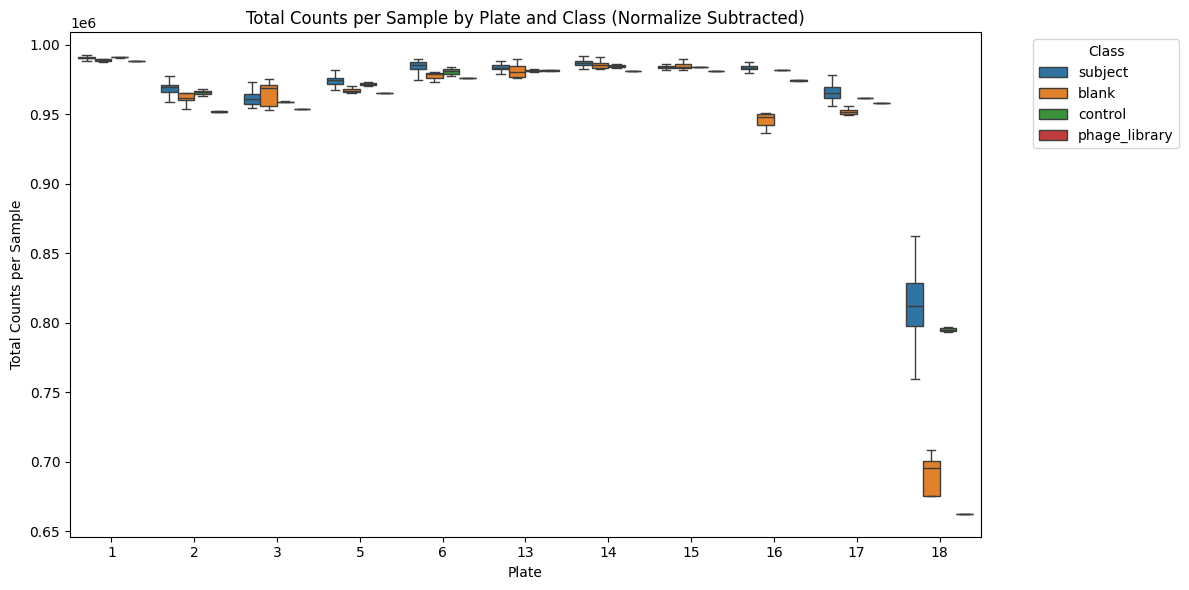

In [34]:
s = s.reset_index().set_index(['sample','subject','type','lane']) #,'plate','class'])
plot_total_counts(s, "Total Counts per Sample by Plate and Class (Normalize Subtracted)")

In [35]:
data_annot

,,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,lane,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,L1,1,subject,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,10
14078-01dup,14078-01,glioma serum,L1,1,subject,0,16,0,0,0,0,0,0,...,36,0,0,4,26,2,0,0,0,1
14118-01,14118-01,glioma serum,L1,1,subject,0,0,0,0,0,0,33,0,...,25,0,0,9,0,0,0,0,0,0
14118-01dup,14118-01,glioma serum,L1,1,subject,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,4,0
14127-01,14127-01,glioma serum,L1,1,subject,0,78,0,0,0,0,0,0,...,38,0,0,0,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416,E097416,glioma serum,L6,18,subject,0,2,0,0,4,0,5,2,...,0,0,4,2,3,0,2,0,0,1
E097416dup,E097416,glioma serum,L6,18,subject,0,10,0,0,9,0,5,0,...,1,0,0,1,7,2,0,0,0,1
E129145,E129145,glioma serum,L6,18,subject,0,1,0,0,4,0,6,1,...,1,0,0,3,1,0,0,0,0,1


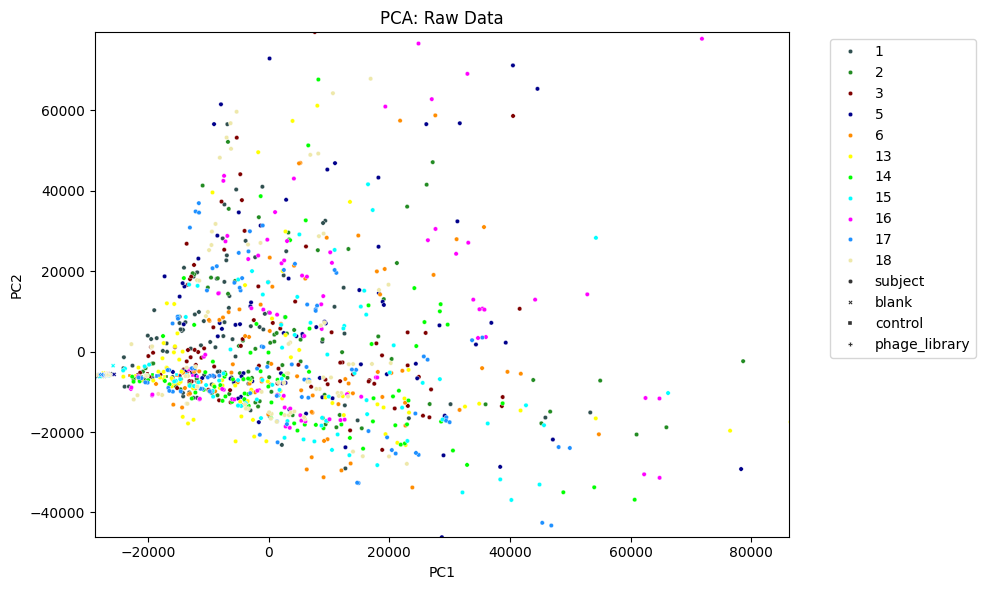

In [36]:
# PCA plots for each step
plot_pca(data_annot.reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0), "PCA: Raw Data")

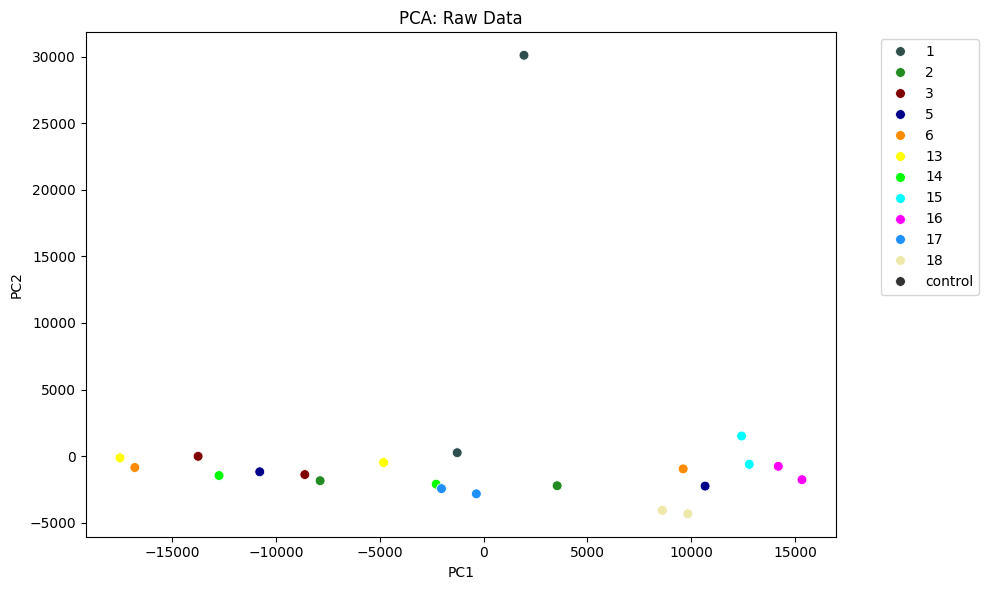

In [37]:
plot_pca(data_annot.loc[
    (data_annot.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0), 
         "PCA: Raw Data",min=0,max=100,size=50)

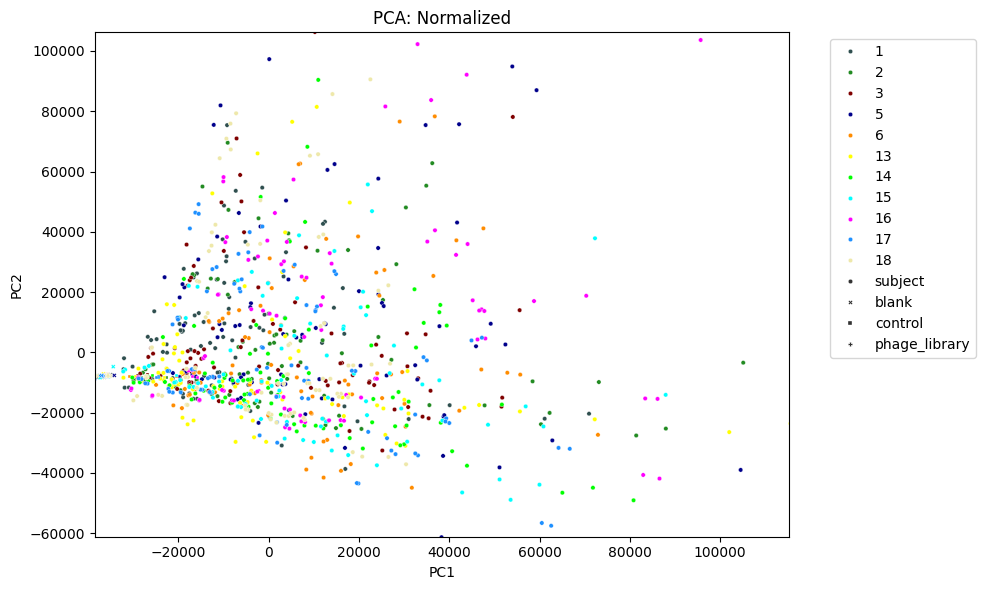

In [38]:
plot_pca(n.reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0), "PCA: Normalized")

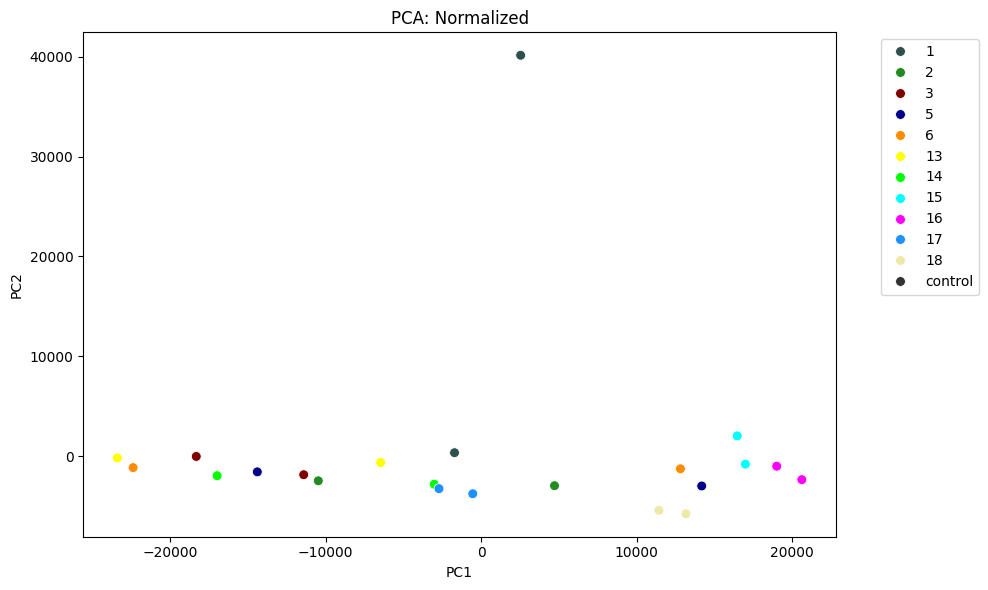

In [39]:
plot_pca(n.loc[
    (n.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0),
         "PCA: Normalized",min=0,max=100,size=50)

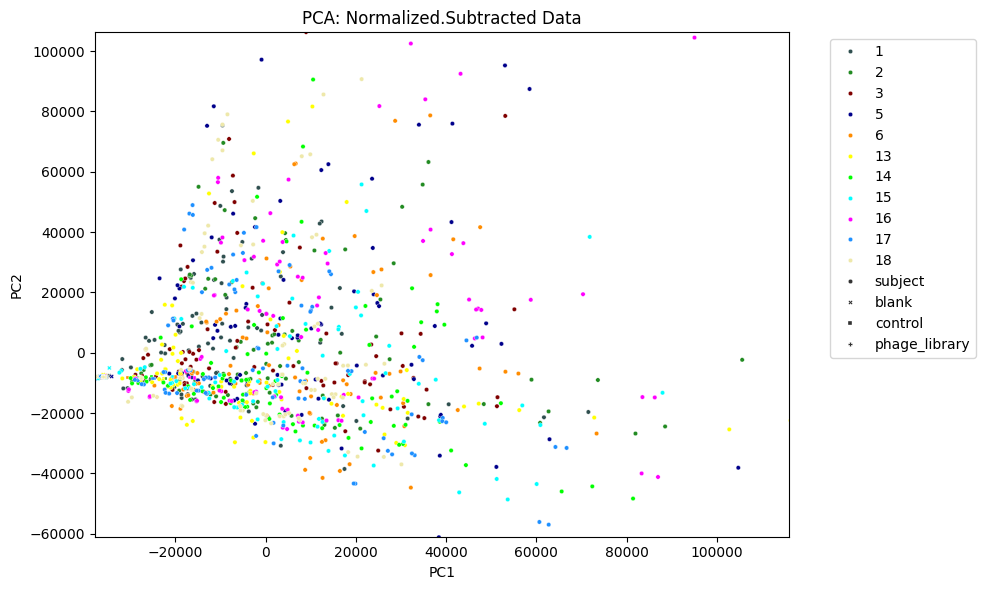

In [40]:
plot_pca(s.reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0), "PCA: Normalized.Subtracted Data")

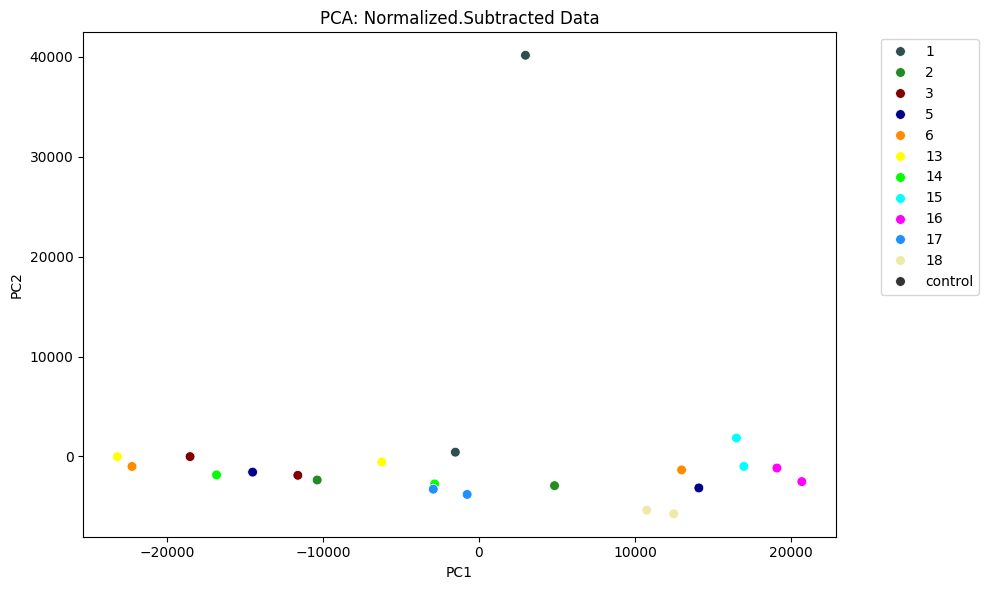

In [41]:
plot_pca(s.loc[
    (s.index.get_level_values('type') == 'commercial serum control'),:
    ].reset_index().set_index('sample').drop(['subject','type','lane'],axis='columns').fillna(0),
         "PCA: Normalized.Subtracted Data",min=0,max=100,size=50)